In [33]:
%pylab inline
from importlib import reload
import multigpu
reload(multigpu)
import utils
import numpy as np
import opt
reload(opt)
from opt import trainAndEvaluatePrimalModel
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


In [28]:
SEQ_SIZE = 300
NUM_GPUS = 16

In [29]:
AllSeqsTrain = open("genomics_small/allTrainSeqsSampled_1000_ATF3_A549").readlines()
AllSeqsVal = open("genomics_small/allValSeqs_1000_ATF3_A549").readlines()
XSeqsTrain = list(map(lambda x: x.split(",")[0].replace("(", "")[500 - SEQ_SIZE//2: 500 + SEQ_SIZE//2], AllSeqsTrain))
XSeqsVal = list(map(lambda x: x.split(",")[0].replace("(", "")[500 - SEQ_SIZE//2: 500 + SEQ_SIZE//2], AllSeqsVal))
XTrain = utils.convertSeqToMatrix(XSeqsTrain)
XTest = utils.convertSeqToMatrix(XSeqsVal)
labelsTrain = list(map(lambda x: float(x.split(",")[1].replace("DenseVector(", "").replace(")", "").strip()), AllSeqsTrain))
labelsTest = list(map(lambda x: float(x.split(",")[1].replace("DenseVector(", "").replace(")", "").strip()), AllSeqsVal))
out = [i[0] for i in enumerate(AllSeqsTrain) if 'N' in i[1]] 
train_idxs = np.ones(XTrain.shape[0])
train_idxs[np.array(out)] = 0
XTrain = XTrain[np.where(train_idxs), :].reshape(sum(train_idxs), -1)
labelsTrain = [x[1] for x in enumerate(labelsTrain) if x[0] not in out]

/home/ec2-user/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [38]:
D = 32768
gamma = 1.0
W = np.random.randn(D,8*4) * gamma

In [35]:
%time XLiftTrain_gpu = multigpu.conv_multi_gpu(XTrain, W, feature_batch_size=4096, batch_size=1024, num_gpu=16)
%time XLiftTest_gpu = multigpu.conv_multi_gpu(XTest, W, feature_batch_size=4096, batch_size=1024, num_gpu=16)


Using gpu device 14: Tesla K80 (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5105)
/home/ec2-user/anaconda/lib/python3.6/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using gpu device 8: Tesla K80 (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5105)
/home/ec2-user/anaconda/lib/python3.6/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using gpu device 7: Tesla K80 (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5105)
/home/ec2-user/anaconda/lib/python3.6/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Thea

gpu14 256 (63559, 512)
gpu8 256 (63559, 512)
gpu7 256 (63559, 512)
gpu6 256 (63559, 512)
gpu2 256 (63559, 512)
gpu3 256 (63559, 512)
gpu12 256 (63559, 512)
gpu1 256 (63559, 512)
gpu11 256 (63559, 512)
gpu5 256 (63559, 512)
gpu4 256 (63559, 512)
gpu15 256 (63559, 512)
gpu0 256 (63559, 512)
gpu9 256 (63559, 512)
gpu13 256 (63559, 512)
gpu10 256 (63559, 512)
1
gpu14 Feature Batch  0
gpu14 Data Batch  0
1
1
1
1
gpu6 Feature Batch  0
gpu3 Feature Batch  0
gpu2 Feature Batch  0
gpu8 Feature Batch  0
gpu6 Data Batch  0
gpu2 Data Batch  0
gpu3 Data Batch  0
gpu8 Data Batch  0
1
gpu11 Feature Batch  0
gpu11 Data Batch  0
1
gpu7 Feature Batch  0
gpu7 Data Batch  0
1
gpu5 Feature Batch  0
gpu5 Data Batch  0
1
gpu12 Feature Batch  0
gpu12 Data Batch  0
1
1
1
1
1
gpu4 Feature Batch  0
gpu1 Feature Batch  0
gpu0 Feature Batch  0
gpu15 Feature Batch  0
gpu9 Feature Batch  0
gpu4 Data Batch  0
gpu1 Data Batch  0
gpu0 Data Batch  0
gpu15 Data Batch  0
gpu9 Data Batch  0
1
1
gpu10 Feature Batch  0
gpu13

Using gpu device 11: Tesla K80 (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5105)
Using gpu device 14: Tesla K80 (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5105)
/home/ec2-user/anaconda/lib/python3.6/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
/home/ec2-user/anaconda/lib/python3.6/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using gpu device 5: Tesla K80 (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5105)
Using gpu device 15: Tesla K80 (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5105)
/home/ec2-user/anaconda/lib/python3.6/site-packages/the

gpu14 256 (8000, 512)
gpu11 256 (8000, 512)
gpu15 256 (8000, 512)
gpu8 256 (8000, 512)
gpu0 256 (8000, 512)
gpu5 256 (8000, 512)
gpu7 256 (8000, 512)
1
gpu14 Feature Batch  0
gpu14 Data Batch  0
gpu6 256 (8000, 512)
1
gpu11 Feature Batch  0
gpu11 Data Batch  0
1
gpu15 Feature Batch  0
1
1
gpu8 Feature Batch  0
gpu15 Data Batch  0
gpu0 Feature Batch  0
gpu8 Data Batch  0
gpu0 Data Batch  0
1
1
gpu7 Feature Batch  0
gpu5 Feature Batch  0
gpu7 Data Batch  0
gpu5 Data Batch  0
gpu1 256 (8000, 512)
gpu3 256 (8000, 512)
1
gpu4 256 (8000, 512)
gpu10 256 (8000, 512)
gpu6 Feature Batch  0
gpu6 Data Batch  0
gpu12 256 (8000, 512)
gpu13 256 (8000, 512)
gpu9 256 (8000, 512)
gpu2 256 (8000, 512)
1
gpu1 Feature Batch  0
gpu1 Data Batch  0
1
1
1
1
1
gpu10 Feature Batch  0
gpu3 Feature Batch  0
gpu12 Feature Batch  0
gpu4 Feature Batch  0
gpu13 Feature Batch  0
gpu10 Data Batch  0
gpu12 Data Batch  0
gpu3 Data Batch  0
gpu13 Data Batch  0
gpu4 Data Batch  0
1
1
gpu2 Feature Batch  0
gpu9 Feature Batch

In [23]:
results = []

(63559, 8192)
(8000, 8192)
X SHAPE  (63559, 8192)
Computing XTX
Done Computing XTX


/home/ec2-user/anaconda/lib/python3.6/site-packages/numpy/lib/twodim_base.py:233: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  m = zeros((N, M), dtype=dtype)
/home/ec2-user/anaconda/lib/python3.6/site-packages/numpy/lib/twodim_base.py:240: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  m[:M-k].flat[i::M+1] = 1
/home/ec2-user/karnals/opt.py:30: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  y = np.eye(max(labels) + 1)[labels]


Train acc 0.80336380371
Test acc 0.827125
Train ROC  0.868917220472
Test ROC  0.764360759494
Train AUPRC  0.815489085371
Test AUPRC  0.056542334172
(63559, 8192)
(8000, 8192)
X SHAPE  (63559, 8192)
Computing XTX
Done Computing XTX
Train acc 0.80336380371
Test acc 0.827125
Train ROC  0.868917148595
Test ROC  0.764360759494
Train AUPRC  0.815489009335
Test AUPRC  0.056542334172
(63559, 8192)
(8000, 8192)
X SHAPE  (63559, 8192)
Computing XTX
Done Computing XTX
Train acc 0.803253669819
Test acc 0.827625
Train ROC  0.868892476708
Test ROC  0.765032911392
Train AUPRC  0.815450927082
Test AUPRC  0.0569433997395
(63559, 8192)
(8000, 8192)
X SHAPE  (63559, 8192)
Computing XTX
Done Computing XTX
Train acc 0.795811765446
Test acc 0.857875
Train ROC  0.860129119087
Test ROC  0.788446835443
Train AUPRC  0.803078821581
Test AUPRC  0.0728072651737
(63559, 8192)
(8000, 8192)
X SHAPE  (63559, 8192)
Computing XTX
Done Computing XTX
Train acc 0.770355103133
Test acc 0.8925
Train ROC  0.8300883392
Test RO

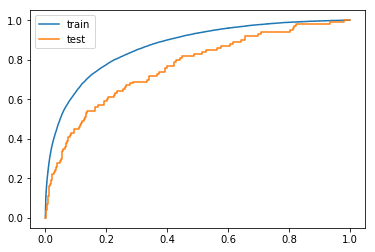

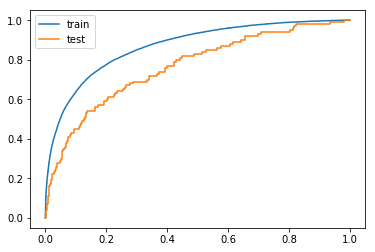

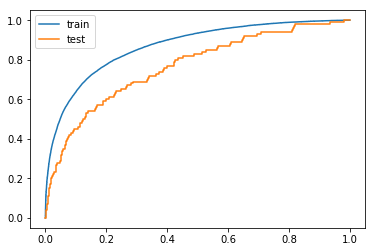

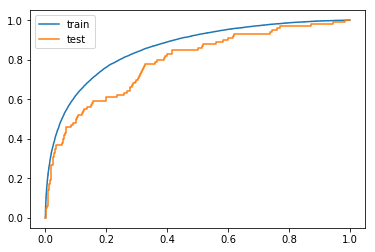

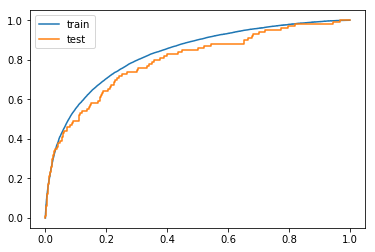

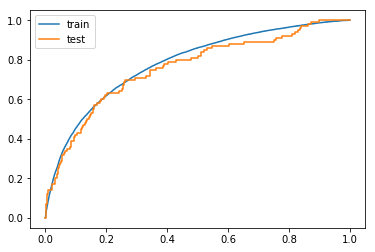

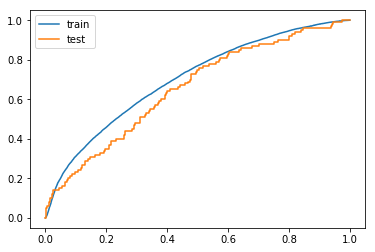

In [37]:
for reg in [1e-8, 1e1, 1e4, 1e6, 1e7, 1e8, 1e9]:
    train_roc, test_roc, train_pr, test_pr = trainAndEvaluatePrimalModel(XLiftTrain_gpu, XLiftTest_gpu,labelsTrain,labelsTest, reg=reg)
    train = plt.plot(train_roc[0], train_roc[1], label="train")
    test = plt.plot(test_roc[0], test_roc[1], label="test")
    train_roc = metrics.auc(train_roc[0], train_roc[1])
    test_roc = metrics.auc(test_roc[0], test_roc[1])
    print ("Train ROC ", train_roc)
    print ("Test ROC ", test_roc)
    print("Train AUPRC ", train_pr)
    print("Test AUPRC ", test_pr)
    plt.legend(handles=[train[0], test[0]])
    plt.figure()
    result = {}
    result['reg'] = reg
    result['feat'] = 16384
    result['train_roc'] = train_roc
    result['test_roc'] = test_roc
    result['train_pr'] = train_pr
    result['test_pr'] = test_pr
    results.append(result)

In [36]:
XLiftTrain_gpu


array([[ -6.80004168,  35.2000351 ,  13.14284229, ..., -12.83204556,
        -10.70271015,  -7.47181606],
       [  9.71037006,  27.11530495,   6.3981576 , ...,   4.73541975,
         -1.40637577, -15.8006258 ],
       [ 19.16628838,  47.76143646,  16.02640724, ...,  -2.04567885,
         -1.40707064,   8.98633575],
       ..., 
       [ 10.8494606 ,  41.47304153,  -7.53436279, ...,  -2.16484308,
        -16.463974  , -23.02899361],
       [  7.5015378 ,  38.63494492, -26.72504425, ...,  13.28696918,
         17.33144951,  -1.60993218],
       [ -9.57894802,  59.52688217,  12.92135906, ...,  19.48972893,
          2.50483871,  22.93844986]], dtype=float32)

In [26]:
XLiftTrain_gpu

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])